<a href="https://colab.research.google.com/github/sunheehee/kaggle-study/blob/main/%5Bkaggle%5D_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필사하는 코드 링크:

https://www.kaggle.com/code/startupsci/titanic-data-science-solutions

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Acquire data(데이터 로드)

In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/DArt-B 5기/너다나비/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/DArt-B 5기/너다나비/test.csv")
combine = [train_df, test_df]

# Analyze by describing data (데이터 탐색)

In [3]:
# 피처 확인
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# 데이터 타입 확인
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 결측치 확인

In [6]:
train_df.info()
print('-' * 40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

- train: cabin, age, embarked 순으로 결측값이 많음
- teset: cabinn, age 순으로 결측값이 많음

#### 수치형 변수들의 분포 확인 - describe()

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 범주형 변수들의 분포 확인

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


- COUNT = UNIQUE는 모두 고유값이라는 것을 시사.
- Cabin: 몇 명의 승객들이 객실을 공유한다는 것을 알아갈 수 있음
    - COUNT: 204 & UNIQUE: 147 → 57개의 객실들이 공유되고 있음을 알 수 있음
- Embarked: S 항구를 가장 많이 사용함, (빈도수 = 644)

# Assumtions based on data analysis

- correlating - 연관성 확인
    - 각 변수들이 Survived와 얼마나 연관성이 있는지 파악
    > 간단한 상관분석을 통해 인사이트를 얻고, 추후 모델링 결과와 비교

- completing - 결측치 보간
- correcting - 이상치 확인 및 변수 제거
    - Ticket: 중복이 22% 이상 + 상관관계도 낮음 ➡️ 삭제 결정
    - Cabin: 결측치가 너무 많아 신뢰할 수 없음 ➡️ 제거
    - PassengerID: 생존 여부에 기여하지 않음 ➡️ 훈련데이터에서 제거
    - Nmae: 비정형 텍스트이고, 직접적인 연관성 없음(Title활용 가능) ➡️ 제거

- creating - 새로운 변수 생성
    - Familysize: Parch + SibSp + 1로 가족 수 게산
    - Title: Name에서 호칭 추출
    - Age bands: 연속형 데이터인 나이 데이터를 구간화해서 순서형 범주형 변수로 생성
    - Fare range: 요금도 구간화

- classifying - 분류를 위한 가설 설정
    - 가설1: 여성들의 생존률이 더 높음
    - 가설2 :아이들의 생존률이 더 높음
    - 가설3: 최상층 승객들의 생존률이 더 높음

실제 분석 작업 시작 전에 이러한 가정을 정리해두면, 분석의 일관성이 높아지고, 결과 해석도 훨씬 수월해진다.

## Analyze by pivoting features


  


### 분석결과 정리

----
**[Pclass]**

Pclass=1과 Survived 사이에서 0.5이ㅣ상의 상관계수를 확인,

➡️특징을 모델에 포함시키기로 함

**[Sex]**

가설1로 세운 문제와 같이, 여성의 생존률이 74%로 매우 높다는 것을 확인함

➡️ 가설 확인!

**[SibSp & Parch]**

특정 값들에 한해서 상관관계가 0인것을 확인

➡️ 개별 특징에서 파생된 새로운 특징 또는 집합을 만드는 것이 좋다.

In [9]:
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


✅ as_index: Pclass를 인덱스가 아닌 일반 컬럼으로 유지

In [10]:
# 한 번 더 따라하기
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


✅ Pclass가 낮을수록 생존률이 높다는 강한 경향성을 확인해볼 수 있었음

➡️ 모델링에 사용할 변수로 채택

In [11]:
## Sex별 생존률
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [12]:
## SibSp별 생존률
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
## Parch별 생존률
train_df[['Parch','Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Analyze by visualizing data(시각화)

### 수치형 변수 - 생존율

#### 관찰결과
---
- 나이가 4세 이하인 영아들의 생존률이 높았음(20 / 5 = 4세)
- 가장 나이가 많은 승객도 생존함
- 15~25세 승객의 다수가 생존하지 못함
- 대부분의 승객은 15~35세 사이에 분포함

#### 결정 사항
---
- Age 변수는 모델 학습에 고려해야하는 중요한 특징이다.
- 결측값을 보완해야하고
- Age를 구간화해서 연령대 그룹을 만들면 좋을듯

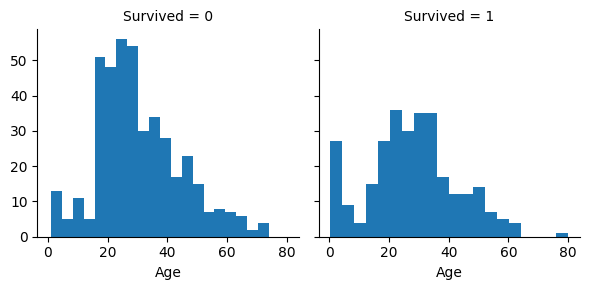

In [14]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

✅FacetGrid: 조건에 따라 여러 그래프를 나눠 그리는 격자 도구

- survived를 기준으로 0과 1로 나누어 2개의 그래프를 생성
    
    ➡️사망자와 생존자의 나이분포를 각각 비교할 수 있음

✅.map() : 지정된 그래프(plt.hist)를 age컬럼으로 그리게 한다

### 숫자형 및 순서형 변수간의 상관관계 분석

#### 관찰결과
---
- 3등석에 가장 많은 승객이 있었지만, 대부분 생존하지 못함
- 2등석과 3등석에서 영아들이 대부분 생존했다
- 1등석의 손님들은 높은 생존률을 보인다
- 또, 이 그래프를 통해 Pclass에 따라 승객의 나이 분포가 조금씩 다름을 확인할 수 있음

#### 결정사항
---
Pclass는 모델 학습에서 고려할 중요한 변수임

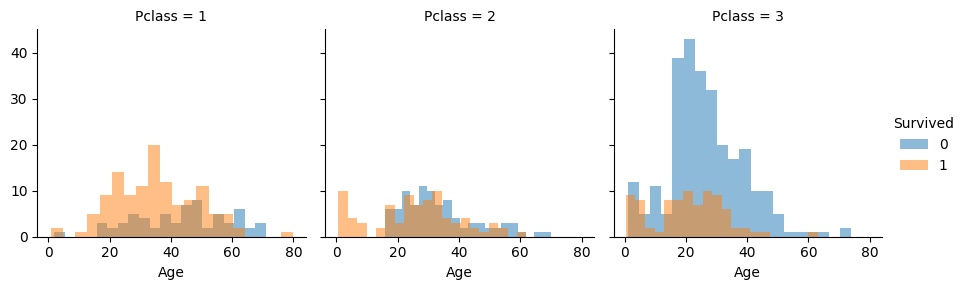

In [15]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

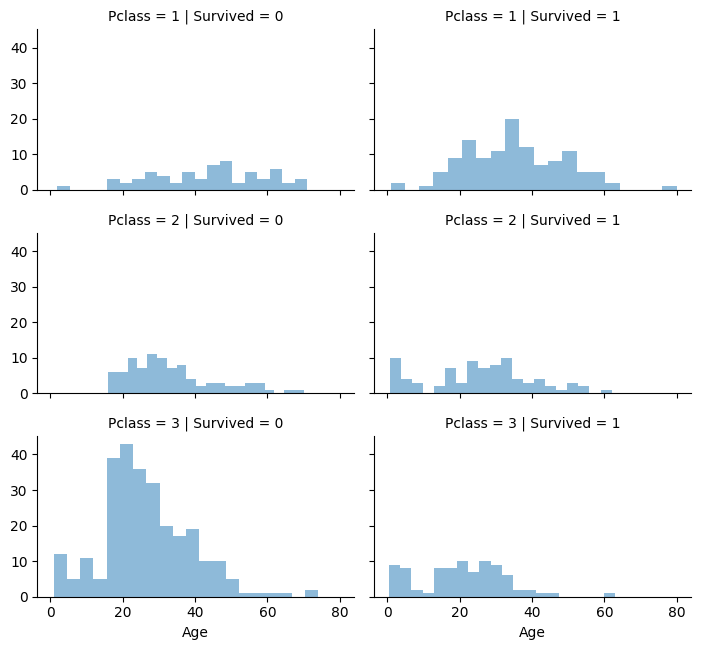

In [16]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha = .5, bins=20)
grid.add_legend()

✅row: 행을 나누는 기준 (1,2,3등석)

✅height, aspect: 각 플롯의 크기와 비율을 설정하는 옵션


### 범주형 변수간의 상관관계 분석

#### 관찰결과
---
- 여성의 생존률이 남성보다 훨씬 높음
- C와 Q 항구에서 출발한 남성들은 2등석일 때보다 3등석일 때 생존율이 더 높았다

#### 결정사항
---
- 변수 Sex 모델 학습에 포함
- Embarked변수는 결측치 처리 후 모델 학습에 포함

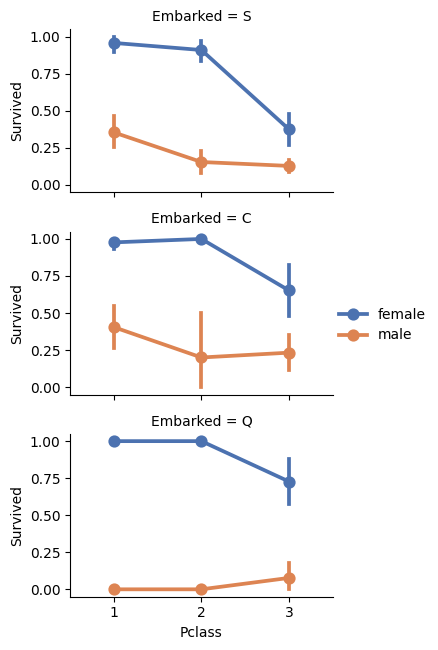

In [17]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map_dataframe(sns.pointplot, x='Pclass', y='Survived', hue='Sex', hue_order =['female','male'], palette='deep')
grid.add_legend()

### 범주형 변수와 수치형 변수 간의 상관관계

#### 관찰결과
---
- 더 비싼 요금을 지불한 승객일수록 생존율 높음
    - ❓근데 여기서 생존률을 어떻게 알 수 있지?
- 탑승항구에 따라 생존율 다름

#### 결정사항
----
- Fare값을 구간화하는 변수를 생성하는것이 좋아보임

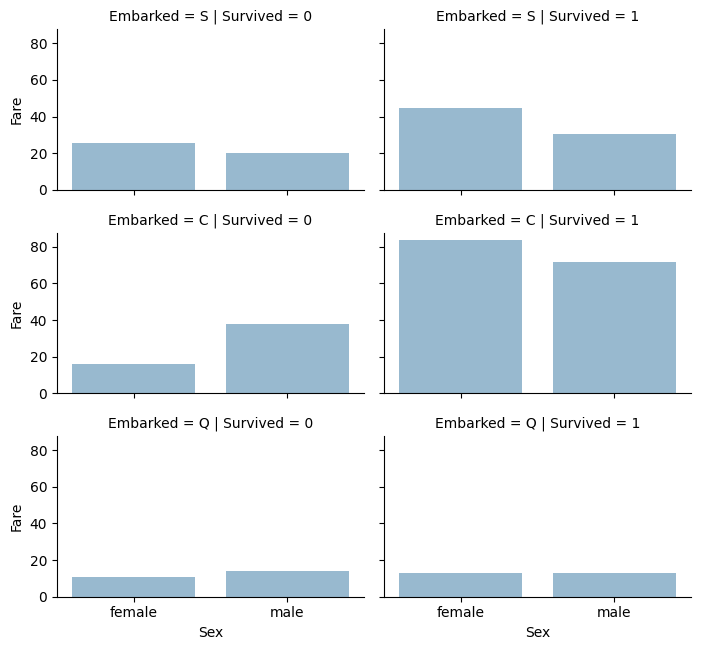

In [18]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', order=['female', 'male'], errorbar=None, alpha=0.5) #왼쪽 그래프가 여자
grid.add_legend()

# Wrangle Data

이전 단게에서는 피벗팅과, 시각화를 통해 나온 결과를 토대로 여러 가설과 결정사항을 수립했다. 이후 단게에서는 데이터 정제를 한다.

수정, 생성, 보완작업을 통해 모델에 필요한 변수들을 만들어낸다.

### Dropping Features
---
train dataset과 test dataset 모두에 같은 작업을 수행해서 일관성을 유지하는 것이 중요하다

In [19]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df=train_df.drop(['Ticket','Cabin'], axis=1)
test_df=test_df.drop(['Ticket','Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


✅ combine[0] == trian_df, comebine[1] == test_df

✅ axis=1; 열 삭제

✅ 위 코드는 train_df, test_df에서 두개의 변수를 삭제 한후에 다시 combine리스트에 업데이트 한다는 코드

### Feature Engineering (특징 생성하기)

Name을 활용해 Title을 추출하고, title과 생존여부간의 상관관계 분석

이후 Name이랑 PassengerID 드랍

In [20]:
#이름에서 Title추출해서 성별 확인
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [21]:
dataset['Name'].unique()

array(['Kelly, Mr. James', 'Wilkes, Mrs. James (Ellen Needs)',
       'Myles, Mr. Thomas Francis', 'Wirz, Mr. Albert',
       'Hirvonen, Mrs. Alexander (Helga E Lindqvist)',
       'Svensson, Mr. Johan Cervin', 'Connolly, Miss. Kate',
       'Caldwell, Mr. Albert Francis',
       'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
       'Davies, Mr. John Samuel', 'Ilieff, Mr. Ylio',
       'Jones, Mr. Charles Cresson',
       'Snyder, Mrs. John Pillsbury (Nelle Stevenson)',
       'Howard, Mr. Benjamin',
       'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)',
       'del Carlo, Mrs. Sebastiano (Argenia Genovesi)',
       'Keane, Mr. Daniel', 'Assaf, Mr. Gerios',
       'Ilmakangas, Miss. Ida Livija',
       'Assaf Khalil, Mrs. Mariana (Miriam")"', 'Rothschild, Mr. Martin',
       'Olsen, Master. Artur Karl',
       'Flegenheim, Mrs. Alfred (Antoinette)',
       'Williams, Mr. Richard Norris II',
       'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)',
       'Robins, Mr. Alexander

✅combine 데이터셋에서 Title 변수를 생성함으로써, train_df와 test_df에 동시에 생성한 것.
(combine)은 편의를 위한 묶음


✅정규표현식
- `' '`: 공백하나
- `([A-Za-z]+)`: 영문자로 이루어진 단어 한 개를 그룹으로 추출
    - [A-Za-z]: 대소문자 영문자 전체
    - `+` : 1개 이상 반복. 즉, 최소 한 글자 이상 영문자로 구성된 단어
    - `( .. )`: 그룹화
    - str.extract(): 이 그룹 안의 값을 추출
- `\.`: 마침표로 끝남

✅expand=False: df형식으로 반환

In [22]:
train_df['Title']

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [23]:
# 소수만 사용하는 희귀 타이틀을 Rare라는 하나의 범주로 통
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col',\
                             'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    # 비슷한 의미의 Title을 표준화
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title','Survived']].groupby(['Title'],as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [24]:
train_df['Title']

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rare
887,Miss
888,Miss
889,Mr


In [25]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


✅dataset의 title변수들에 대해서 모두 매핑

✅title이 없는 샘플을 고려해서 0으로 채워 누락 방지

In [26]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### Converting Categorical Features (인코딩)
---
대부분의 머신러닝 알고리즘은 문자형 데이터를 직접 처리할 수 없기 때문에, 이를 수치형으로 변환하는 과정이 필요하다.

In [27]:
# Sex 변수 인코딩
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Completing a numerical continuous feature

- 연속형 변수들 결측값 채우기

결측값 채우는 방법
1. 단순 무작위 생성법
- 전체 변수의 평균 +_ 표준편차 범위내에서 무작위 값 생

2. 상관특징 기반 중앙값 대처법
- Age는 Pclass와 Gender변수와 상관이 있었으므로, 이 조합에 따라 중앙값을 계산해서 해당 그룹의 결측값을 보완
    - 예시: Pclass=1 & Gender = 0 → 중앙값 A

3. 조합 기반 무작위 생성법
- 방법 2처럼 그룹을 나누고, 중앙값 대신 평균 +_ 표준편차 내의 무작위값으로 채움

        - 방법 1과 3은 무작위성을 포함해 모델에 noise를 발생시킬 가능성이 큼
        - 여러번 실행할 때마다, 결과가 달라져 일관성이 떨어짐
        > 따라서 방법 2 사용


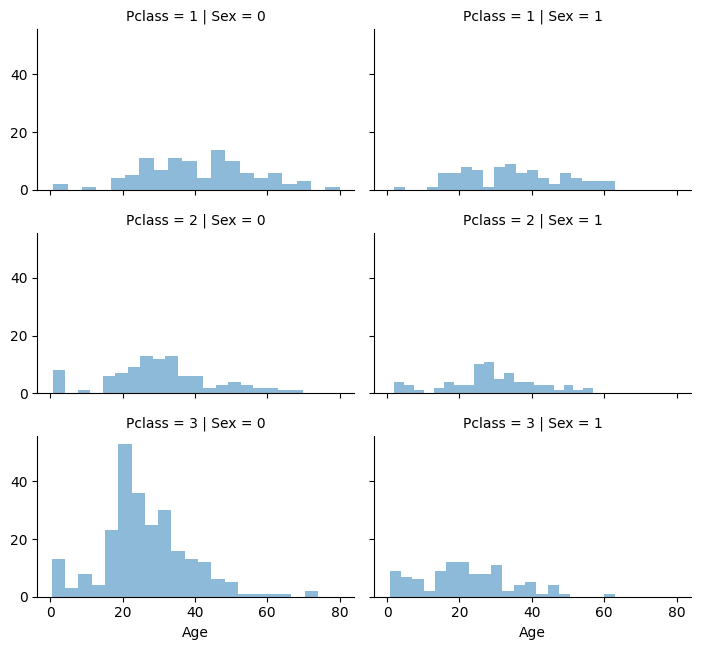

In [28]:
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [29]:
# 2행 3열 크기의 배열을 모두 0으로 채워 생성
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [30]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


✅ "성별이 i이고, Pclass가 j+1인 승객들만 필터링

✅ 해당 조건에 맞는 승객들의 Age를 추출.
- 하지만 결측치가 있는 age값도 있음
- 이때, dropna를 해서 결측치가 없는 값들만 남겨서
- age_guess에 결측치가 없는 값들의 중앙값을 저장

<결측치 채우기>

✅dataset.loc[(행 조건식들),열이름]
- 조건을 만족하는 행들중에서, Age열에 값을 할당하겠다는 뜻.
- 즉, Age가 결측치이고, 성별 + Pclass의 조합을 가진 Age열 값만 선택하겠다.
- 그 열만 선택해서 guess_ages(이미 조건별 중앙값이 채워진 값)을 이용해 결측치 보간

In [31]:
# 연령대 컬럼 만들기
train_df['AgeBand']=pd.cut(train_df['Age'],5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

<ipython-input-31-912f55ae93b7>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


✅pd.cut()함수
- 연속형 수치형 데이터를 구간으로 나누는 함수
- 즉, 5개의 구간으로 자르겠다는 뜻
- 결과는 범주형 데이터로 표현됨


In [32]:
# 연령대 컬럼(범주형) 순서형 수치형 데이터로 변환

for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [33]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Create new feature combining existing features

변수 생성
- FamilySize

In [34]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1 #+1은 본인 포함

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [35]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


개인적인 의견:
FamilySize마다 생존률이 달라져서 FamilySize를 남겨두는게 좋다고 생각 한 편, 숫자가 너무 많아지니까 나중에 모델 성능에 안 좋은 영향이 있을까라는 생각 한편..

In [36]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [37]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:,['Age*Class','Age','Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


### completing a categorical feature
- 범주형 데이터 결측값 처리
- Embark: 최빈값으로 처리

In [38]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

mode()[0] : 여러개의 최빈값 중 첫번째 값만

In [39]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### converting categorical feature to numeric

범주형 변수 > 수치형 변수 변환

단순한 궁금증

S가 1일수도, 2일수도 있는데, 숫자를 부여하는 기준은 상관없는지?

> 선형 모델이 아니라면 숫자간 순서나 거리를 고려하지 않기 때문에 상관없음

- 트리기반모델은 상관없음

In [40]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


### Qucik completing and converting a numeric feature

결측치를 빠르게 채우거나, 수치형으로 빠르게 변환하는 방법

1. 결측값 채우기(Completing)
- 결측값이 단 1개뿐이라면 빈값으로 채움
2. 값 반올림(Converting)
- Fare는 통화 단위여서, 소수점 둘째 자리까지 반올림하는 것을 권장함

In [41]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

<ipython-input-41-e290e000cf8e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [42]:
#Fare 범주화
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

<ipython-input-42-43e0fd57ca86>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand','Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


✅qcut(): 데이터를 동일한 개수의 샘플이 들어가도록 나누는 함수.

qcut(컬럼명,4) 4분위로 나눈다는 뜻


In [43]:
# 범주형 데이터를 순서형 데이터로 변환
for dataset in combine:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare']> 7.91) & (dataset['Fare'] <= 14.54), 'Fare'] = 1
    dataset.loc[(dataset['Fare']> 14.54) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare']> 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]

train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [44]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


# 모델링

모델 학습을 시작하기 전에, 어떤 종류의 문제인지를 명확히 정의하고, 이에 맞는 알고리즘을 적절히 선별하는 것이 필요

- 해당 문제는 분류 문제
> Survived라는 문제를 해결해야함

- 동시에 변수들 간의 관계도 분석해야해서 회귀적 요소를 포함할 수도 있음

- 정답이 주어진 데이터로 모델을 학습하고 있기 때문에, 지도학습에 해당함

➡️ 지도학습 + 분류문제 (회귀적 요소가 들어간)



✔️Logistic Regression

✔️KNN or k-Nearest Neighbors

✔️Support Vector Machines

✔️Naive Bayes classifier

✔️Decision Tree

✔️Random Forrest

✔️Perceptron

✔️Artificial neural network

✔️RVM or Relevance Vector Machine

In [45]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [46]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,1,0,0,1,0,3
1,1,1,2,3,1,3,0,2
2,3,1,1,1,0,2,1,3
3,1,1,2,3,0,3,0,2
4,3,0,2,1,0,1,1,6


In [47]:
X_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


### Logistic Regression

로지스틱 회귀는 초기 탐색적 모델링에 적합해서, 변수와 목표값 간의 관게를 빠르게 파악할 수 있다.

로지스틱 회귀는 범주형 종속 변수와 하나이상의 독립변수간의 관게를 측정

- 로지스틱 함수(시그모이드 함수)를 이용해 각 입력이 특정 클래스(생존? 사망?) 에 속할 확률을 추정
- 누적 로지스틱 분포를 기반으로 게산

- 모델은 훈련 데이터셋을 기반으로 각 데이터 포인트가 생존할 확률과 예측 결과를 제공함

- 신뢰점수(=예측 확률)와 함께 출력되는데, 이는 모델이 얼마나 확신을 가지고 분류를 했는지를 나타냄

In [48]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.14

✅.score()는 기본적으로 predict()를 호출한 뒤에, 에측값과 실제값을 비교한 후 정확도를 반환함

→ 훈련 데이터(X_train)에 대해 모델이 Y_train을  얼마나 잘 맞추었는지를 보여줌

로지스틱 회귀를 통해 우리가 만든 변수들이 정말 생존에 영향을 미치는지 검증할 수 있음

✅ 로지스틱 회귀를 통한 가정 및 특징 생성 / 보완 검증
- 로지스틱 회귀는 각 변수마다 coefficient(게수)를 계산함
- 이는 생존확률 (Survived=1)에 영향을 줌

**해석방법**
- 양(+)의 계수: 해당 특징 값이 커질수록 생존확률도 커짐
- 음(-)의 게수: 해당 특징 값이 커질수록 생존확률 낮아짐

#### 결과해석
---
1. Sex변수: 가장 큰 양의 게수
- 값이 0에서 1로 증가할수록 생존 확률이 크게 증가함
- 즉, 여성이 생존할 확률이 높음을 강하게 뒷받침

2. Pclass변수 : 가장 큰 음의 계수
- Pclass값이 증가할수록 생존확률이 감소함
- 즉, 상류층일수록 생존확률이 높아진다는 가정과 일치

3. Title변수: 두번째로 큰 양의 게수
- 생존여부와 긍정적인 상관관계가 있음을 확인
- 특정 타이틀이 생존 확률을 높이는데 기여함을 확인

4. Age x Class
- 고령의 하위 게층 승객일수록 생존확률이 낮음을 의미
- 효과적인 파생 변수였다~

In [49]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.199077
5,Title,0.403577
4,Embarked,0.283814
6,IsAlone,0.257431
3,Fare,-0.006687
7,Age*Class,-0.041765
2,Age,-0.483250
0,Pclass,-1.164718


✅ train_df.columns.delete(0) : 컬럼 리스트에서 0번째 컬럼(Survived) 제거

왜냐하면 Survived는 정답컬럼이어서 사용되지 않기 때문

✅logreg.coef_: 로지스틱 회귀 모델이 학습한 계수(weights) 값

✅coef_[0]: 첫번째 클래에 대한 계수 배열

### SVM(Support Vecotr Machine)

- 지도학습 모델
- 분류와 회귀분석에 모두 사용됨
- train_df가 두 범주 중 하나에 속하도록 라벨링 되어있을 때, 각 범주를 가장 잘 구분하는 초평면을 학습함
- 새로운 test_df가 주어졌을 때, 학습된 경계를 기준으로 둘 중 하나의 클래스에 속하도록 분류
- logistic Regression처럼 확률기반이 아닌, 이진 선형 분류 모델로 간주

#### 결과해석
---
로지스틱 회귀 모델보다 점수(신뢰도)가 더 높음
- 즉, 에측 결과에 대해 더 확신을 가지는 경향이 있음


In [50]:
# SVM
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred= svc.predict(X_test)
acc_svc=round(svc.score(X_train, Y_train) * 100,2)
acc_svc

82.72

### KNN(K-Nearest Neighbors)

- 비모수 방식의 알고리즘
- 분류와 회귀 모두에 사용
- 어떤 데이터 포인트를 예측할 때, 가장 가까운 k개의 이웃을 찾고, 그 이웃들 중 가장 많이 등장하는 클래스로 예측값을 지정
    - 에시: k=3, 가장 가까운 3개의 클래스 중 다수를 차지하는 클래스로 예측

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100,2)
acc_knn

83.95

### Gaussian Naive Bayes


- 확률 기반 분류 무델
- 각 변수들이 서로 독립적이라고 가정하고 계산
- 특히 텍스트 분류, 스팸 필터링에 효과적

#### 결과해석
---
지금까지 평가한 모델들 중 가장 점수가 낮음
- 독립성 가정이 현실과 맞지 않는 듯함

In [52]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

### Perception
- 이진 분류를 위한 지도 학습 알고리즘
- 입력값에 **가중치를 곱해 선형 방정식**으로 결과를 예측
- 선형 분류기의 일종이며, 가중치 조절을 통해 학습함


In [53]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

75.98

In [54]:
# LinearSVC
linear_svc= LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred=linear_svc.predict(X_test)
acc_linear_svc=round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.46

In [55]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd= round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.69

### Decision Tree

변수들을 가지처럼 분기시키고, 예측값은 잎으로 표현됨

- 만약 목표 변수가 범주형이면 분류 트리

- 연속형 실수이면 회귀트리



#### 결과해석
---
지금까지의 모델들 중에서 가장 높은 신뢰점수를 기록

In [56]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
Y_pred = tree.predict(X_test)
acc_tree = round(tree.score(X_train, Y_train) * 100, 2)
acc_tree

87.09

### RandomForest

결정 트리를 여러개 생성해서 그 결과를 종합해 에측을 수행하는 방식

- 분류문제: 개별 트리들의 예측 중에서 가장 많이 나온 클래스를 선택
- 회귀문제: 개별 트리 예측값들의 평균을 사용
- 과적합에 강하고, 정확도가 높아 인기있는 모델

#### 결과해석
---
결정트리랑 비슷하게 나왔지만, 보통 결정트리보다 높은 신뢰 점수 기록

In [57]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred=rf.predict(X_test)
rf.score(X_train, Y_train)
acc_rf = round(rf.score(X_train, Y_train) * 100, 2)
acc_rf

87.09

# Model evaluation

#### 결과해석
---
결정트리와 랜덤포레스트 모두 동일한 신뢰점수를 기록했지만, 랜덤포레스트가 과적합 방지에 더 강함 + 더 일반화된 에측 성능을 보임

In [58]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_rf, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,87.09
8,Decision Tree,87.09
1,KNN,83.95
0,Support Vector Machines,82.72
2,Logistic Regression,81.14
6,Stochastic Gradient Decent,79.69
7,Linear SVC,79.46
4,Naive Bayes,76.88
5,Perceptron,75.98


In [59]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })